In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pyswmm
from pyswmm import Simulation, LidControls, LidGroups, Subcatchments, Nodes
import os
import swmm
import swmmio as sio

The following block of code will run a SWMM model and output a .txt report file. 

In [2]:
with Simulation(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\MeadowCreekSWMM\Meadow_Creek_Hydrology_Model_UpdatedFeb2021.inp", reportfile = r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\MeadowCreekSWMM\Meadow_Creek_Hydrology_Model_UpdatedFeb2021.txt') as sim:
                                       
                    
                    # 3 days in seconds - This will be used as the routing step
                    control_time_step = 86400*3
                    sim.step_advance(control_time_step)
                       

                # Run the simulation
                    for step in sim:
                        pass

                    sim.report()
                    sim.close()

The following blocks access the time series data for subcatchment 73461 from our report file. 

In [3]:
# This is for Subcatchment 73461
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73461 = pd.read_csv(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\MeadowCreekSWMM\Meadow_Creek_Hydrology_Model_UpdatedFeb2021.txt", skiprows = 7375, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73461.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73461.rename(columns = {'0':'Date','2':'Precip (mm/hr)','3':'Losses (mm/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

In [4]:
pd.set_option('max_columns', None)
rpt_73461.head()

,Date,Precip (mm/hr),Losses (mm/hr),Runoff (CFS),Total Nitrogen (mg/L),Total Phosphorous (mg/L)
0,01/01/2000 00:30:00,0.011,0.003,0.0000,0.000,0.0
1,01/01/2000 01:00:00,0.011,0.002,0.0182,0.792,0.0
2,01/01/2000 01:30:00,0.011,0.002,0.0247,0.878,0.0
3,01/01/2000 02:00:00,0.013,0.003,0.0279,0.914,0.0
4,01/01/2000 02:30:00,0.013,0.003,0.0326,0.911,0.0


In [13]:
#Peak flow value
rpt_73461['Runoff (CFS)'].max()

12.8466

In [12]:
#Mean runoff CFS
rpt_73461[rpt_73461['Runoff (CFS)']!=0]['Runoff (CFS)'].mean()

0.5081399999999998

In [24]:
# Nitrogen Load EMC (mg/s)
rpt_73461[rpt_73461['Total Nitrogen (mg/L)']!=0]['Total Nitrogen (mg/L)'].mean() * rpt_73461[rpt_73461['Runoff (CFS)']!=0]['Runoff (CFS)'].mean()*28.3168

16.249958916583683

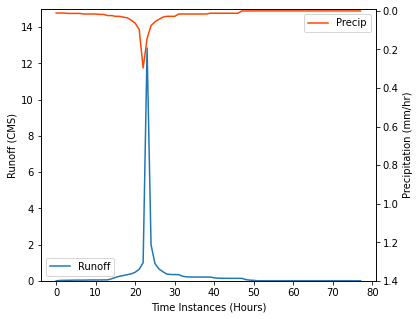

In [13]:
fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73461['Runoff (CMS)']); plt.ylim((-0.001,15)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CMS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73461['Precip (mm/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (mm/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');